In [1]:
import torch
import matplotlib.pyplot as plt
import os
from PIL import Image
from transformers import AutoModelForVision2Seq, AutoProcessor
from torchvision import transforms

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

from transformers import BlipForConditionalGeneration
# Load the pre-trained model from hugging face
# The model can be found at https://huggingface.co/luisdomene4/BLIP-Finetune-Recipes
path_to_model = "BLIP-Finetune-Recipes"
model_finetuned = AutoModelForVision2Seq.from_pretrained(path_to_model)
model_finetuned.to(device)

processor = AutoProcessor.from_pretrained("model_resources")


torch.Size([1, 3, 384, 384])
rice balls with pork and vegetables


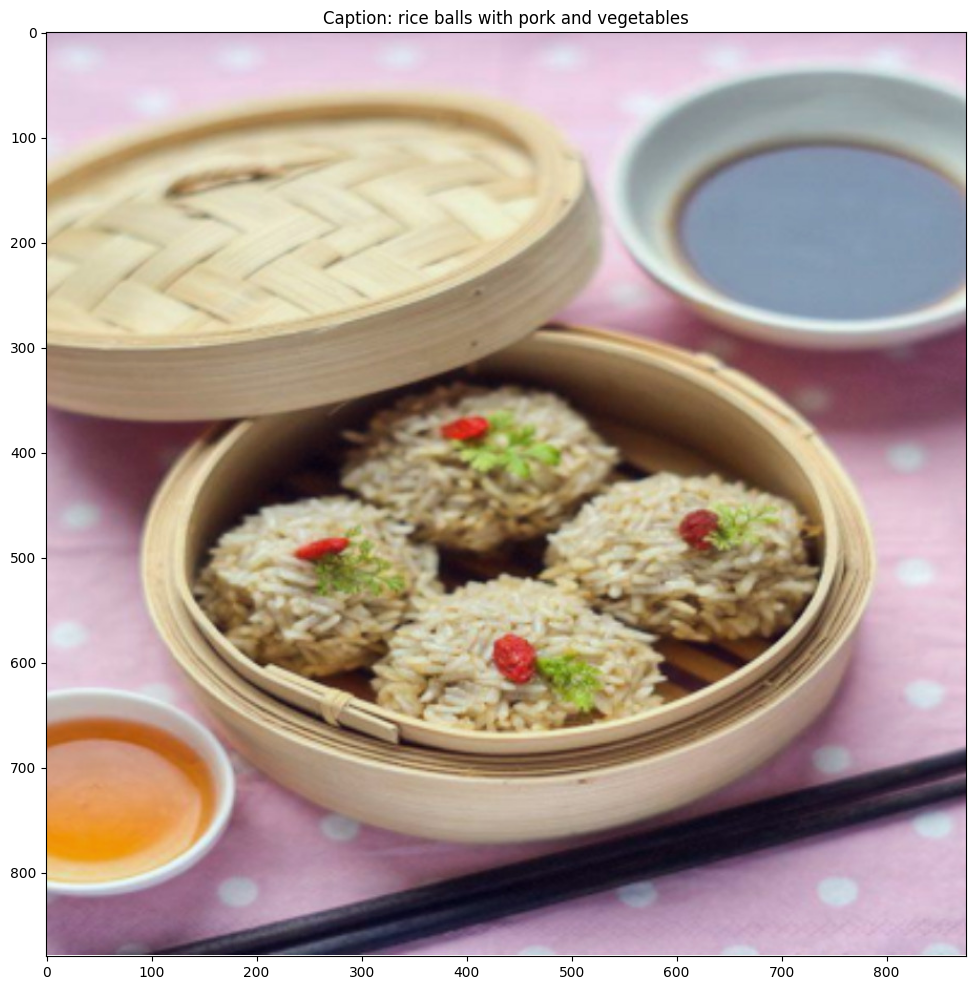

torch.Size([1, 3, 384, 384])
salted butter cookies


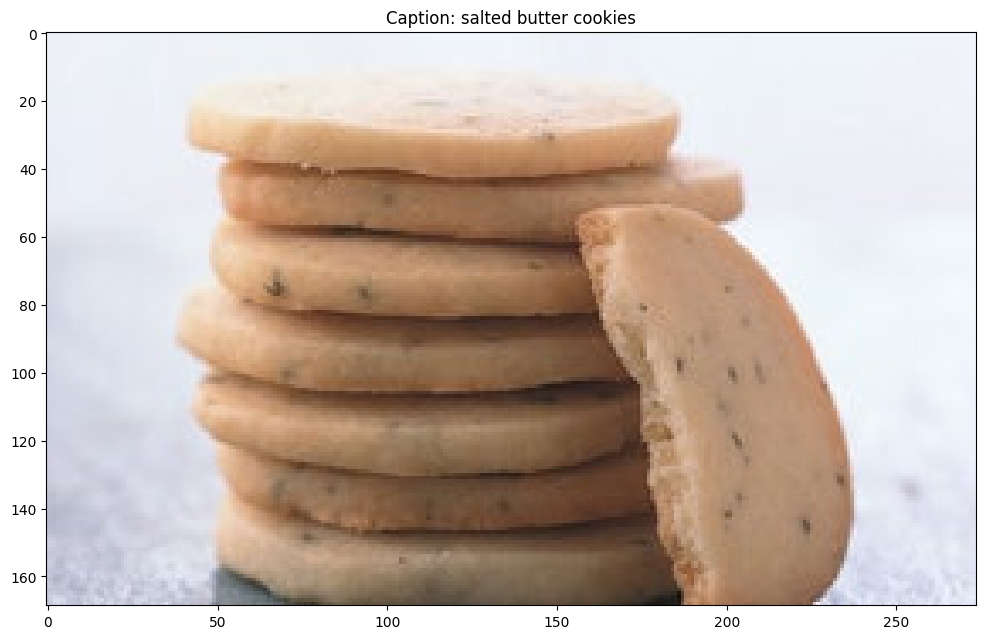

torch.Size([1, 3, 384, 384])
pecan - caramel tart


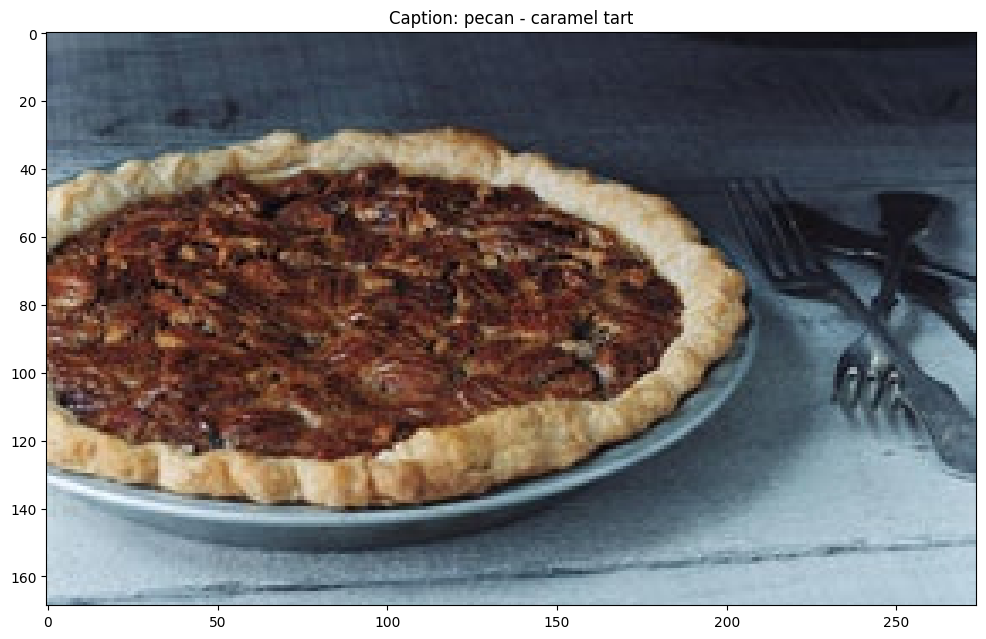

torch.Size([1, 3, 384, 384])
strawberry cupcakes


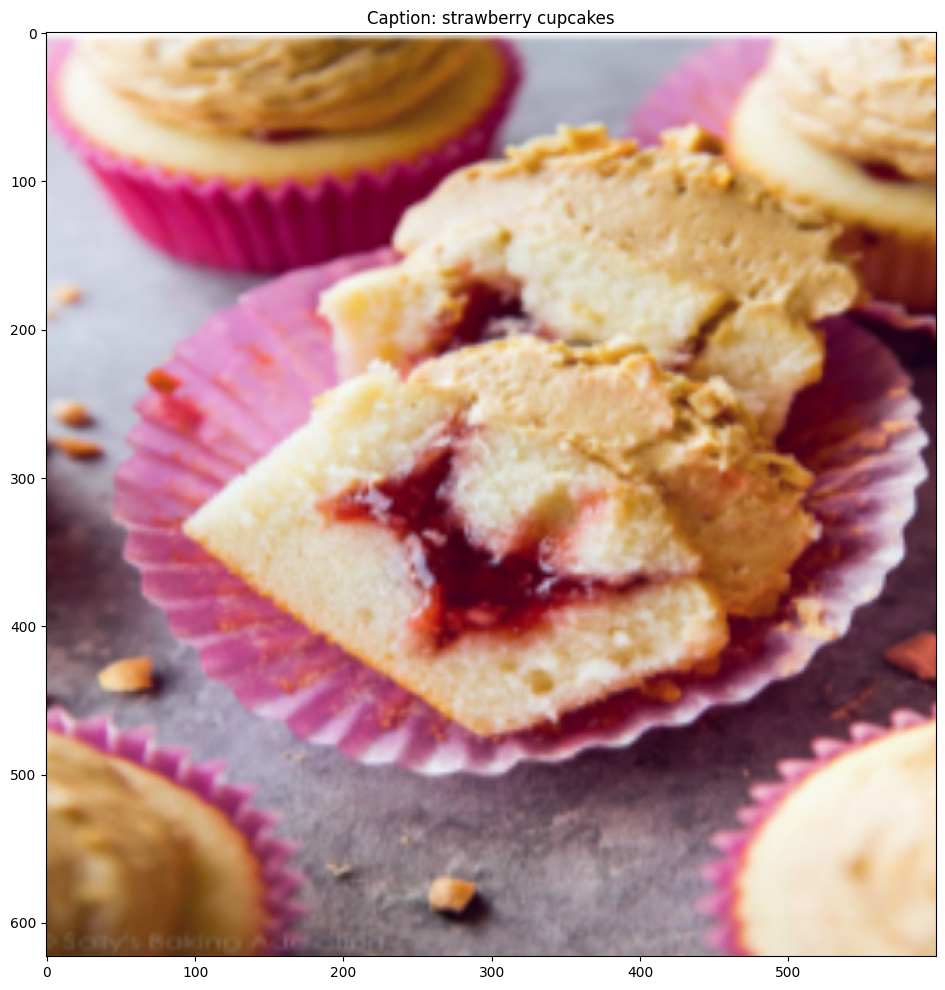

torch.Size([1, 3, 384, 384])
arugula salad with mushrooms and parmesan


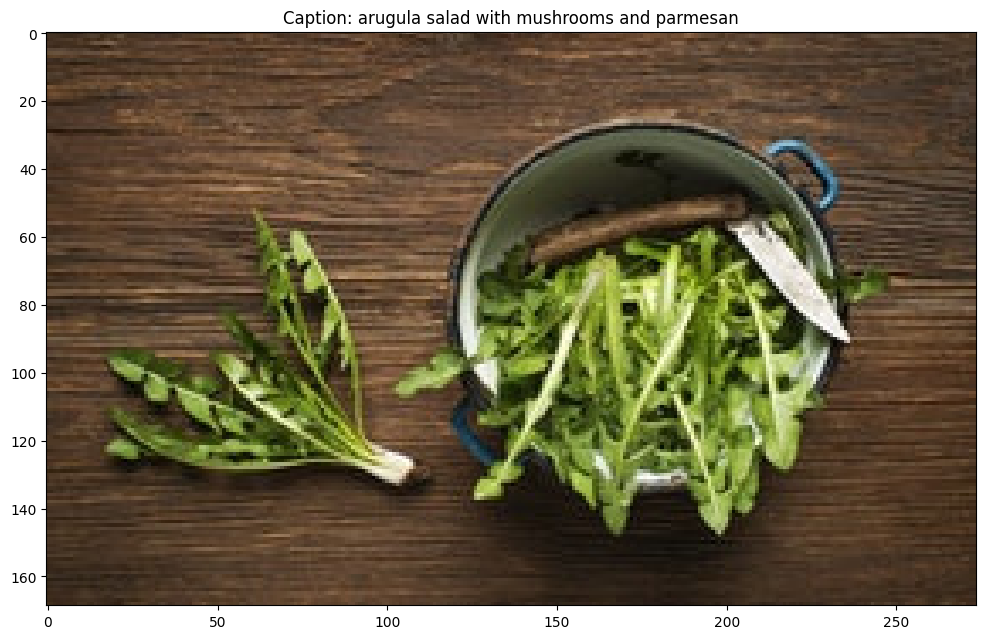

In [5]:
def read_images(path_directory):
    for file in os.listdir(path_directory): 
        if file.endswith(".jpg"):
            path = os.path.join(path_directory, file)
            caption = get_caption(path)
            print(caption)
            plt.figure(figsize=(12, 12))
            plt.title(f"Caption: {caption}")
            plt.imshow(Image.open(os.path.join(path_directory, file)))
            plt.show()
            plt.close()

def get_caption(img_path):
   

    image = Image.open(img_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
    
    print(inputs.pixel_values.shape)
    pixel_values = inputs.pixel_values
    generated_ids = model_finetuned.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_caption

read_images("/home/ldomene/CAP-GIA/eric_images/")

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pre-trained model from the checkpoint 5 which is the best checkpoint
model_finetuned = AutoModelForVision2Seq.from_pretrained("/home/ldomene/CAP-GIA/blip/last_model_saved")
model_finetuned.to(device)

processor = AutoProcessor.from_pretrained("model_resources")


In [ ]:
def read_images(path_directory):
    for file in os.listdir(path_directory): 
        if file.endswith(".jpg"):
            path = os.path.join(path_directory, file)
            caption = get_caption(path)
            plt.figure(figsize=(12, 12))
            plt.title(f"Describe the dish of the image: {caption}")
            plt.imshow(Image.open(os.path.join(path_directory, file)))
            plt.show()
            plt.close()

def get_caption(img_path):
   

    image = Image.open(img_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
    
    print(inputs.pixel_values.shape)
    pixel_values = inputs.pixel_values
    generated_ids = model_finetuned.generate(pixel_values=pixel_values, max_length=50)
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_caption

read_images("/home/ldomene/CAP-GIA/eric_images/")
